<a href="https://colab.research.google.com/github/kurtlee1984/Data_analysis_practice/blob/main/AI_practice_series_5_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 5.線性迴歸 (Linear Regression)

#### 簡單線性迴歸
$ y=ax+b $, a為斜率, b為截距

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 產生隨機資料
np.random.seed(0)
noise = np.random.rand(100, 1)
noise
x = np.random.rand(100, 1)
# y=ax+b, a=3, b=15
y = 3 * x + 15 +noise

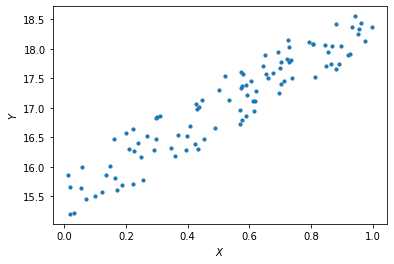

In [3]:
fig, ax = plt.subplots()
ax.scatter(x = x, y = y, s = 10)
ax.set(xlabel = "$X$", ylabel = "$Y$")
plt.show()

#### Linear Regression
    將複雜的資烙數據, 擬和至一條直線上, 方便預測未來的資料
#### parameters :
- fit_intercept : 是否有截距, 如果沒有則直線過原點。

#### attributes :
- coef_ : 取得斜率。
- intercept_ : 取得截距。

#### methods :
- fit : 放入 x, y 進行擬合。
- predict : 預測並回傳預測類別。
- score : R2score 模型評估。

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept = True)
lr.fit(x, y)
predict = lr.predict(x)

#### 模型評估
    scikit-learn 決策樹回歸模型的 score 函式是 R2score , 作模型評估, 數值越接近 1 代表模型越好, 其他評估方法, 例如 : MES、MAE、RMSE。

In [5]:
from sklearn import metrics
print("R2 score :", lr.score(x, y))

mse = metrics.mean_squared_error(y, predict)
print("\nMSE score :", mse)

rmse = metrics.mean_squared_error(y, predict, squared = False)
print("\nRMSE score :", rmse)

R2 score : 0.888257994980688

MSE score : 0.08275457812228756

RMSE score : 0.28767095460314995


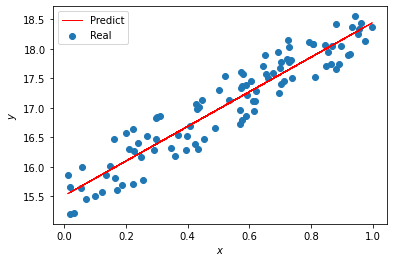

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = x, y = y, label = "Real")
ax.plot(x, predict, color ="r", label = "Predict", linestyle = "-", linewidth = 1)
ax.set(xlabel = "$x$", ylabel = "$y$")
ax.legend()
plt.show()

In [7]:
coef =lr.coef_
intercept = lr.intercept_

print("斜率 :", coef[0][0].round(5))
print("截距 :", intercept[0].round(5))

斜率 : 2.93112
截距 : 15.50917


#### 多線性迴歸
$ y=a_{0}+a_{1}x_{1}+a_{2}x_{2}+a_{3}x_{3}+a_{4}x_{4}\dots $, 在 y 上建立多為的陣列。

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# 產生隨機資料
rng = np.random.RandomState(0)
x1 = 10 * rng.rand(100, 3)
y1 = .5 + np.dot(x1, [.5, -1., 2.])

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept = True)
lr.fit(x1, y1)
predict1 = lr.predict(x1)

In [11]:
coef1 =lr.coef_
intercept1 = lr.intercept_

print("斜率 :", list((coef1).round(5)))
print("截距 :", intercept1.round(5))

斜率 : [0.5, -1.0, 2.0]
截距 : 0.5


In [12]:
import pandas as pd
df = pd.DataFrame(x1)
df.columns = ["x1", "x2", "x3"]

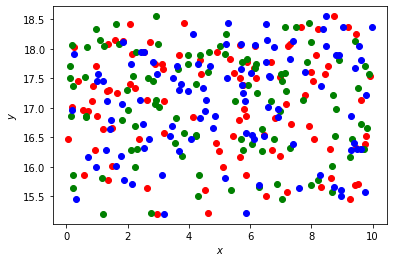

In [13]:
fig, ax = plt.subplots()
ax.scatter(x = x1[:, 0], y = y, color = "r")
ax.scatter(x = x1[:, 1], y = y, color = "g")
ax.scatter(x = x1[:, 2], y = y, color = "b")
ax.set(xlabel = "$x$", ylabel = "$y$")
plt.show()

#### 非線性迴歸

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# 資料
x2 = np.array([1, 2, 3, 4, 5])
y2 = np.array([1, 3, 8, 6, 2])

x2 = x2[:, np.newaxis]

x2.shape

(5, 1)

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept = True)
lr.fit(x2, y2)
predict2 = lr.predict(x2)

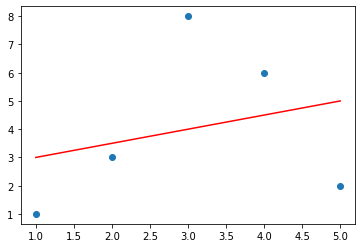

In [17]:
fig, ax = plt.subplots()
ax.scatter(x = x2, y = y2)
ax.plot(x2, predict2, color = "r")
plt.show()

In [23]:
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(10000)

10000


In [24]:
from sklearn.preprocessing import PolynomialFeatures
# make_pipeline 可以將多個 scikit_learn 的 function 一起執行
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialRegression(degree), LinearRegression(**kwargs))

predict3 = PolynomialRegression(degree = 4).fit(x2, y2).predict(x2)

RecursionError: ignored

In [ ]:
fig, ax = plt.subplots()
ax.plot(x2, y2, maker = "o")
plt.show()